<a href="https://colab.research.google.com/github/Kynantio/PCVK/blob/main/Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Jobsheet 5 PCVK
##Kynantio Candra Abrari
##2141720206 / 3A / 16

###Praktikum 1

 Gamma Correction pada citra 
----------------------------------
Masukkan nilai Gamma: 3


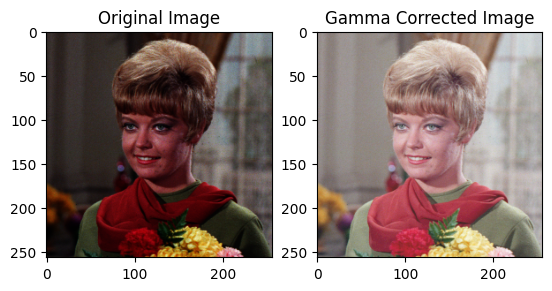

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

print(' Gamma Correction pada citra ')
print('----------------------------------')

def adjust_gamma(image, gamma):
    inv_gamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** inv_gamma) * 255
                      for i in np.arange(0, 256)]).astype("uint8")
    return cv2.LUT(image, table)

# Membaca citra
image = cv2.imread('/content/drive/MyDrive/Polinema/PCVK/Images/female.tiff')

# Mengatur nilai gamma
gamma = int(input('Masukkan nilai Gamma: '))

# Melakukan gamma correction pada citra
adjusted = adjust_gamma(image, gamma)

# Menampilkan citra asli dan hasil gamma correction
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(adjusted, cv2.COLOR_BGR2RGB))
plt.title("Gamma Corrected Image")

plt.show()

###Praktikum 2

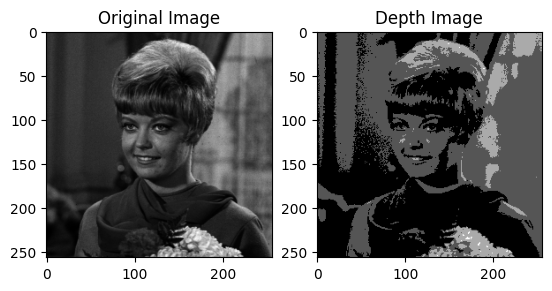

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

bit_depth = 2
level = 255 / (pow(2, bit_depth) - 1)
original = cv2.imread('/content/drive/MyDrive/Polinema/PCVK/Images/female.tiff', cv2.IMREAD_GRAYSCALE)
depth_image = np.zeros(original.shape, original.dtype)

for i in range(original.shape[0]):
    for j in range(original.shape[1]):
        depth_image[i, j] = int(original[i, j] / level + 0.5) * level

# Menampilkan gambar asli dan hasil kuantisasi citra
plt.subplot(1, 2, 1)
plt.imshow(original, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(depth_image, cmap='gray')
plt.title('Depth Image')

plt.show()

###Praktikum 3

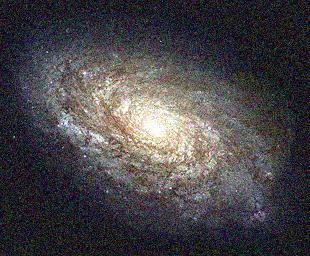

In [ ]:
from google.colab.patches import cv2_imshow
import cv2 as cv
import glob

# Load the image
cv_img = []
for img in glob.glob('/content/drive/MyDrive/Polinema/PCVK/Images/noise/*.jpg'):
    n = cv.imread(img)
    cv_img.append(n)

# Apply average denoising to the image
dst = cv.fastNlMeansDenoisingColoredMulti(cv_img, 99, 1)
cv2_imshow(n)

In [ ]:
import math

def PSNR(img,amount):
  first_image = img[0]
  for x in range(1,amount):
    if(x==0):
      continue
    first_image = first_image - img[x]
    #print(x)
  mse = np.mean((first_image) ** amount)
  if(mse == 0):
    return 100
  max_pixel = 255.0
  psnr = 20 * math.log10(max_pixel / math.sqrt(mse))
  return psnr

print('PSNR')
print('------------------------------')
try:
  averageCitra = int(input('Masukan jumlah citra average: '))
except ValueError:
  print('Error, not a number')
result = PSNR(cv_img,averageCitra)
print('Nilai PSNR: ')
print(result)

PSNR
------------------------------
Masukan jumlah citra average: 5
Nilai PSNR: 
28.355389211112715


In [ ]:
import glob
from math import log10, sqrt

original = cv.imread('/content/drive/MyDrive/Polinema/PCVK/Images/galaxy.jpeg')
cv_img = []
for img in glob.glob('/content/drive/MyDrive/Polinema/PCVK/Images/noise/*.jpg'):
    n = cv.imread(img)
    cv_img.append(n)

dst = cv_img[0]
noise_number = 4 # nomor (array) gambar pada folder noises
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

Nilai PSNR adalah 27.52588460754806 (dB)


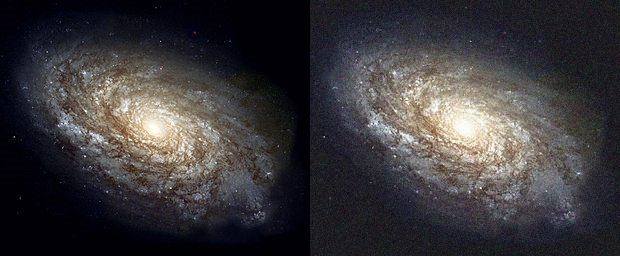

In [ ]:
def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0):  # MSE is zero means no noise is present in the signal.
                  # Therefore PSNR have no importance.
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

Nilai PSNR adalah 27.52588460754806 (dB)


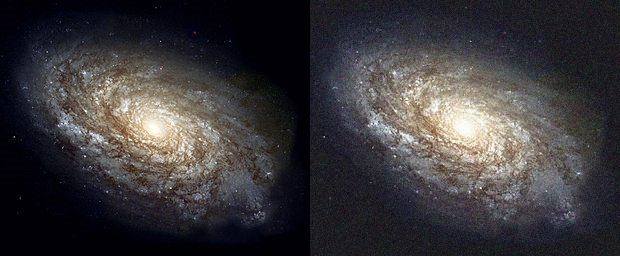

In [ ]:
# Memakai jumlah average 5
dst = cv_img[0]
noise_number = 5
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

###Praktikum 4

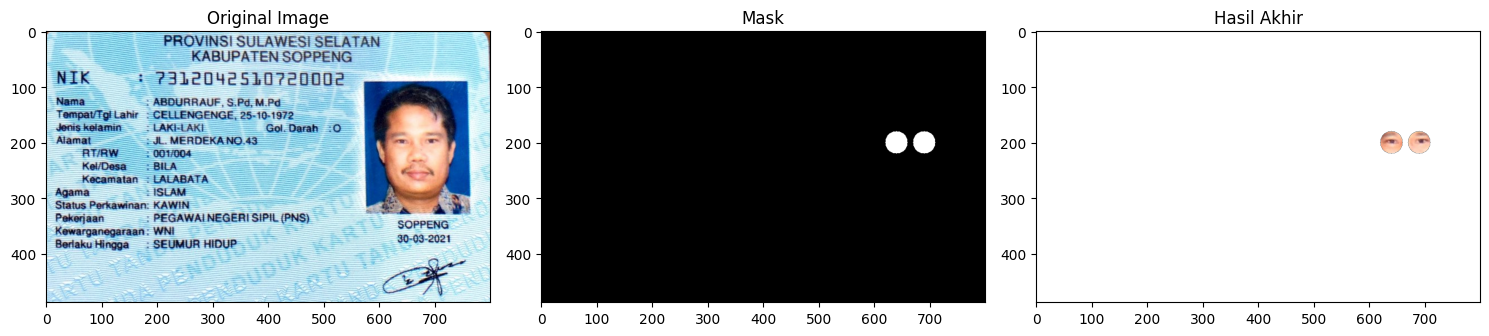

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Membaca gambar asli
image_path = '/content/drive/MyDrive/Polinema/PCVK/Images/ktp_bapak_random.jpeg'
original_image = cv.imread(image_path)

# Membuat maska dengan dua lingkaran putih
mask = np.zeros(original_image.shape[:2], dtype="uint8")
cv.circle(mask, (640, 200), 20, 255, -1)
cv.circle(mask, (690, 200), 20, 255, -1)

# Menggunakan operasi bitwise untuk mendapatkan bagian gambar yang ada di dalam maska
masked = cv.bitwise_and(original_image, original_image, mask=mask)

# Mengonversi gambar menjadi grayscale
tmp = cv.cvtColor(masked, cv.COLOR_BGR2GRAY)

# Menggunakan teknik thresholding
_, alpha = cv.threshold(tmp, 0, 255, cv.THRESH_BINARY)

# Memisahkan saluran warna Red, Green, Blue dari gambar asli
b, g, r = cv.split(masked)

# Membuat list yang berisi saluran warna Red, Green, Blue, dan saluran alpha
rgba = [b, g, r, alpha]

# Menggunakan cv.merge() untuk menggabungkan keempat saluran ke dalam gambar RGBA
final = cv.merge(rgba)

# Menampilkan gambar samping-sampingan menggunakan matplotlib
plt.figure(figsize=(15, 5))

# Gambar asli
plt.subplot(131)
plt.imshow(cv.cvtColor(original_image, cv.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('on')

# Maska
plt.subplot(132)
plt.imshow(mask, cmap='gray')
plt.title('Mask')
plt.axis('on')

# Hasil akhir dengan latar belakang transparan
plt.subplot(133)
plt.imshow(cv.cvtColor(final, cv.COLOR_BGRA2RGBA))
plt.title('Hasil Akhir')
plt.axis('on')

plt.tight_layout()
plt.show()

##Praktikum 5

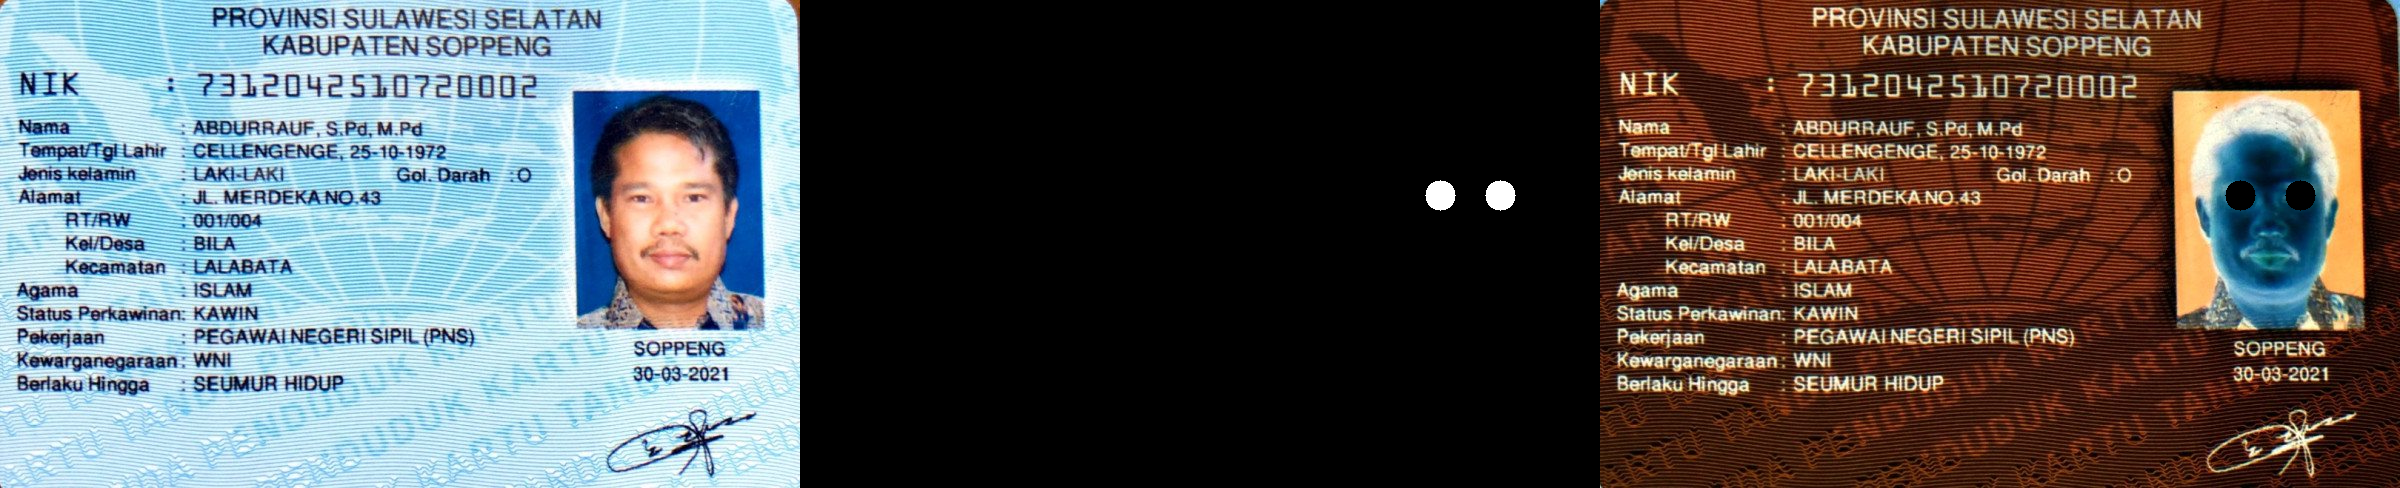

In [3]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow

# Membaca gambar asli
original = cv.imread('/content/drive/MyDrive/Polinema/PCVK/Images/ktp_bapak_random.jpeg')

# Membuat gambar mask dengan dua lingkaran berwarna putih (255, 255, 255)
mask = np.zeros(original.shape, dtype=np.uint8)
mask = cv.circle(mask, (640, 195), 15, (255, 255, 255), -1)
mask = cv.circle(mask, (700, 195), 15, (255, 255, 255), -1)

# Melakukan operasi NOT
masked = ~original & ~mask

# Menggabungkan hasil citra asli, mask, dan hasil operasi NOT
final_frame = cv.hconcat((original, mask, masked))

# Menampilkan gambar
cv2_imshow(final_frame)

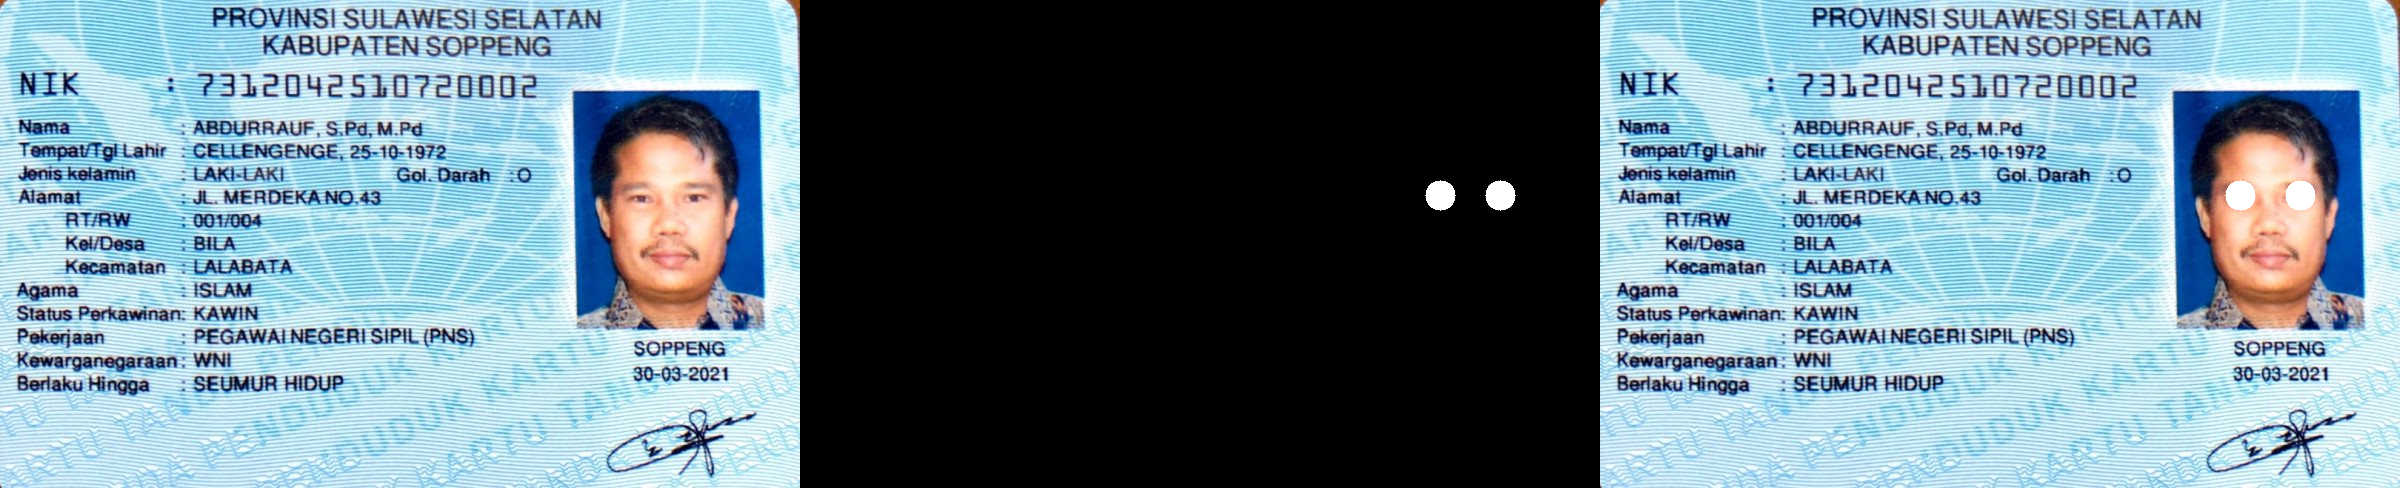

In [4]:
# Membaca gambar asli
original = cv.imread('/content/drive/MyDrive/Polinema/PCVK/Images/ktp_bapak_random.jpeg')

# Membuat gambar mask dengan dua lingkaran berwarna putih (255, 255, 255)
mask = np.zeros(original.shape, dtype=np.uint8)
mask = cv.circle(mask, (640, 195), 15, (255, 255, 255), -1)
mask = cv.circle(mask, (700, 195), 15, (255, 255, 255), -1)

# Melakukan operasi OR
masked = original | mask

# Menggabungkan hasil citra asli, mask dan hasil operasi OR
final_frame = cv.hconcat((original, mask, masked))

# Menampilkan hasil
cv2_imshow(final_frame)

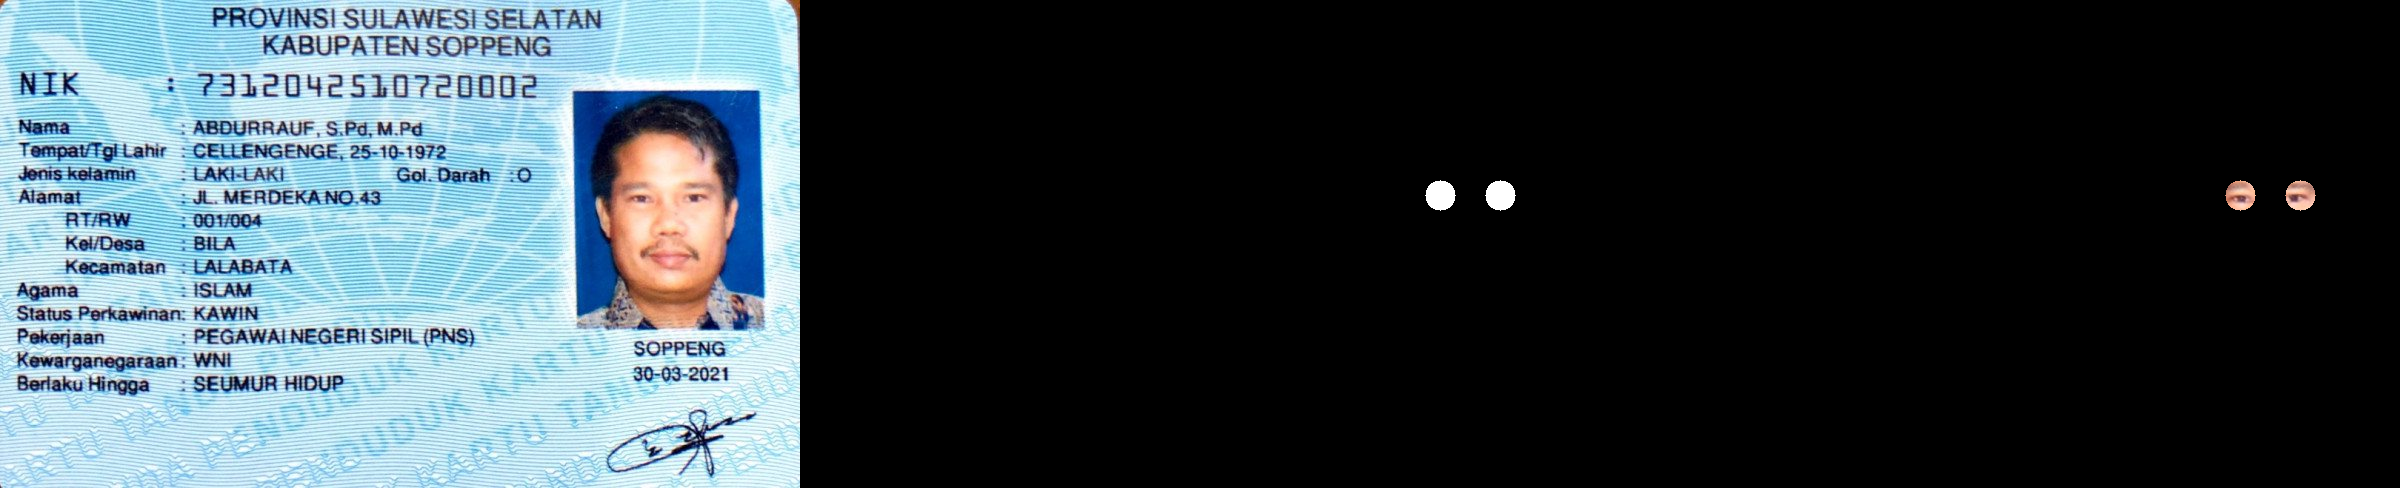

In [5]:
# Membaca gambar asli
original = cv.imread('/content/drive/MyDrive/Polinema/PCVK/Images/ktp_bapak_random.jpeg')

# Membuat gambar mask dengan dua lingkaran berwarna putih (255, 255, 255)
mask = np.zeros(original.shape, dtype=np.uint8)
mask = cv.circle(mask, (640, 195), 15, (255, 255, 255), -1)
mask = cv.circle(mask, (700, 195), 15, (255, 255, 255), -1)

# Melakukan operasi AND bitwise antara gambar asli dan mask
masked = cv.bitwise_and(original, mask)

# Menggabungkan citra asli, mask, dan hasil AND bitwise
final_frame = cv.hconcat((original, mask, masked))

# Menampilkan hasil
cv2_imshow(final_frame)

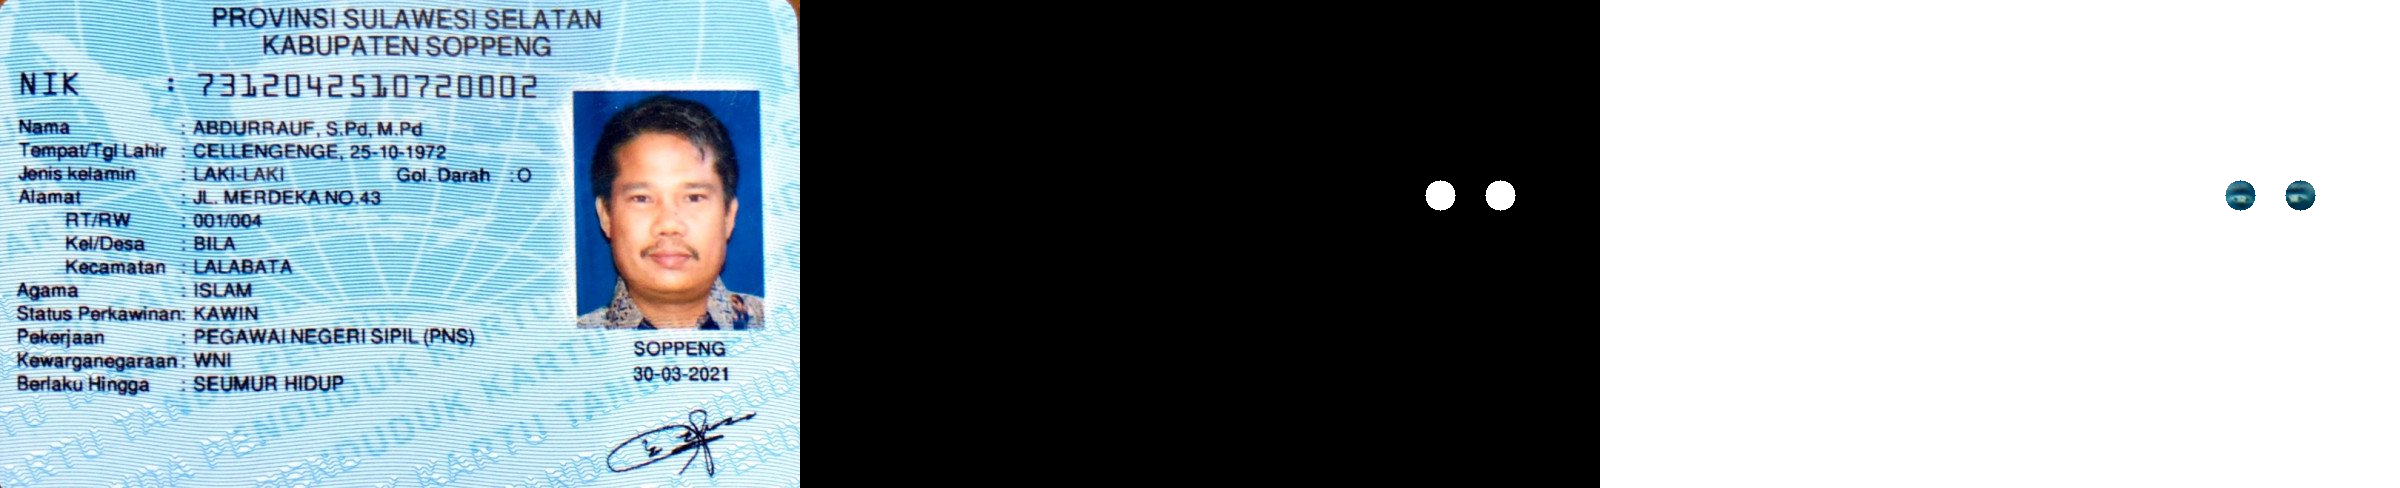

In [6]:
# Membaca gambar asli
original = cv.imread('/content/drive/MyDrive/Polinema/PCVK/Images/ktp_bapak_random.jpeg')

# Membuat gambar mask dengan dua lingkaran berwarna putih (255, 255, 255)
mask = np.zeros(original.shape, dtype=np.uint8)
mask = cv.circle(mask, (640, 195), 15, (255, 255, 255), -1)
mask = cv.circle(mask, (700, 195), 15, (255, 255, 255), -1)

# Melakukan operasi AND bitwise antara gambar asli dan mask
and_result = cv.bitwise_and(original, mask)

# Melakukan operasi AND bitwise antara gambar asli dan mask
nand_result = cv.bitwise_not(and_result)

# Menggabungkan citra asli, mask, dan hasil NAND bitwise dalam satu frame
final_frame = cv.hconcat((original, mask, nand_result))

# Menampilkan hasil
cv2_imshow(final_frame)

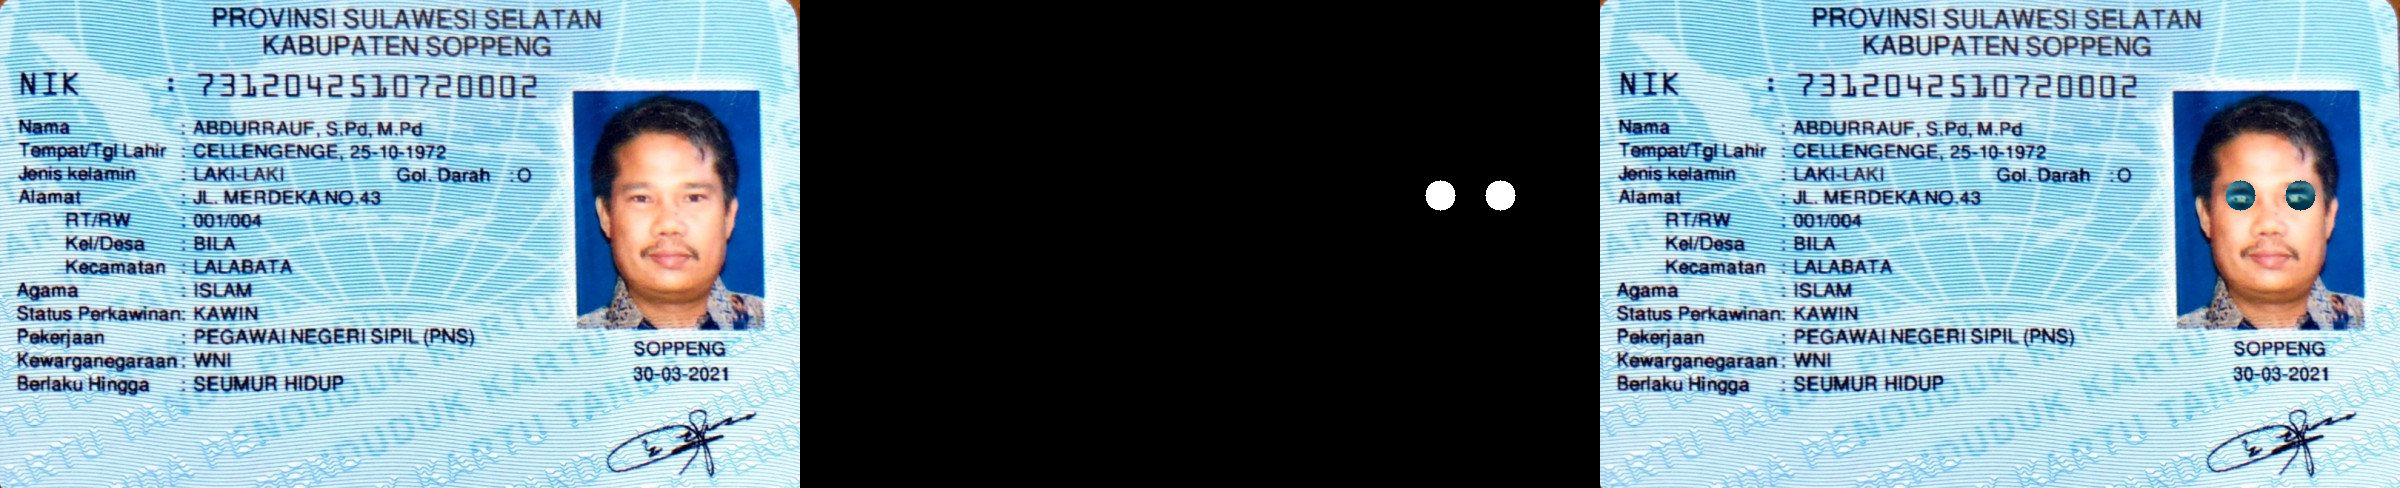

In [7]:
# Membaca gambar asli
original = cv.imread('/content/drive/MyDrive/Polinema/PCVK/Images/ktp_bapak_random.jpeg')

# Membuat gambar mask dengan dua lingkaran berwarna putih (255, 255, 255)
mask = np.zeros(original.shape, dtype=np.uint8)
mask = cv.circle(mask, (640, 195), 15, (255, 255, 255), -1)
mask = cv.circle(mask, (700, 195), 15, (255, 255, 255), -1)

# Melakukan operasi AND bitwise antara gambar asli dan mask
masked = cv.bitwise_xor(original, mask)

# Menggabungkan citra asli, mask, dan hasil XOR bitwise dalam satu frame
final_frame = cv.hconcat((original, mask, masked))

# Menampilkan hasil
cv2_imshow(final_frame)

Hasil setelah menggunakan operator:

Operator NOT : Citra menjadi negatif.

Operator OR : Gabungan dua lingkaran putih pada citra asli.dan akan menambahkan mask di citra

Operator AND : Area terbatas dari kedua lingkaran putih yang tumpang tindih.

Operator NAND : Area tumpang tindih menjadi negatif.

Operator XOR : Area yang tidak tumpang tindih dari kedua lingkaran putih.